
<img src="https://www.exalumnos.usm.cl/wp-content/uploads/2015/06/ISOTIPO-Color.jpg" style="float:right" height="100px">
<img src="https://www.inf.utfsm.cl/images/sitio/di.png" style="float:left;"height="100px">
<center>
    <h1> INF-395/477 Redes Neuronales Artificiales - I-2020</h1>
    <h1> Taller 2 - Redes Neuronales y *Deep Learning*</h1>
    <h3> Parte 2: Kaggle </h3>
</center>

# Sección nueva

## Integrantes: 
* Gabriel Arjona  - 201473529-4
* Roberto Fuentes - 201173037-2 
* German Treimun  - 20l173085-2

## Grupo:
* Los Gatos con Corbatin

# Librerias 

In [91]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import re
import numpy as np
import pandas as pd
import os

from scipy import spatial

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras import layers
from keras.layers import Dropout, Input
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Primera forma (usando tokenizer)

Se clona la data y mediante pandas se cargan los tweet y sus textos.

In [7]:
!git clone https://github.com/rffuente/INF-395-477---Tareas.git

Cloning into 'INF-395-477---Tareas'...
remote: Enumerating objects: 5300, done.
remote: Counting objects: 100% (5300/5300), done.
remote: Compressing objects: 100% (4070/4070), done.
remote: Total 15476 (delta 1231), reused 5289 (delta 1221), pack-reused 10176
Receiving objects: 100% (15476/15476), 94.87 MiB | 20.84 MiB/s, done.
Resolving deltas: 100% (1350/1350), done.
Checking out files: 100% (15502/15502), done.


In [8]:
path = "INF-395-477---Tareas/Taller_2/kaggle/"
#os.mkdir("new_train")

In [ ]:
df = pd.read_fwf(path+'train_source_tweets.txt',sep = "\t",header=None,
    names=["idTweet", "text"],  # set our own names for the columns
)

Se procede a "limpiar" el texto, eliminando diversos simbolos y dejandolo en miúsculas, entre otros.

In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text):
    """
    text: a string
        return: modified initial string
    """
    lower = text.lower() # lowercase text
    space_replace = REPLACE_BY_SPACE_RE.sub(" ",lower) #replace REPLACE_BY_SPACE_RE symbols by space in text
    nosymb = BAD_SYMBOLS_RE.sub("",space_replace) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = re.sub(r"\s*\b(?:{})\b".format("|".join(STOPWORDS)), "", nosymb) # delete STOPWORDS
    return re.sub(r" {2,}", " ", text.strip())

In [ ]:
df['text'] = df['text'].apply(lambda x : text_prepare(x))
df

,idTweet,text
0,692735698349199360,north korea planning kind rocket launch us off...
1,525008463819464704,meet kevin vickers hero shot parliament hill g...
2,505611045897924608,15 year old swatted gamer convicted domestic t...
3,693466724822323200,audio recordings reveal cpr started 11 minutes...
4,510922415468449792,awful mt scclemonsuk aid worker david haines b...
...,...,...
1921,515598200796090369,#workplace hero shoots #altonnolen #stabbings ...
1922,535257207991205888,russian boy shocked electricity claims superpo...
1923,524944399890124801,recap gunman shot dead inside parliament build...
1924,519965814175567872,vandal painted brilliantly simple penis 2 mill...


Se cargan los labels de los tweets

In [ ]:
labels = pd.read_csv(
    path+'train_labels.csv',
    sep=",",  # tab-separated
    skiprows=[0],
    header=None,  # no heading row
    names=["label","idTweet"],  # set our own names for the columns
)
labels = labels.set_index("idTweet")
labels = labels["label"]
labels

df = df.set_index("idTweet")
df = df["text"]

In [ ]:
df

idTweet
692735698349199360    north korea planning kind rocket launch us off...
525008463819464704    meet kevin vickers hero shot parliament hill g...
505611045897924608    15 year old swatted gamer convicted domestic t...
693466724822323200    audio recordings reveal cpr started 11 minutes...
510922415468449792    awful mt scclemonsuk aid worker david haines b...
                                            ...                        
515598200796090369    #workplace hero shoots #altonnolen #stabbings ...
535257207991205888    russian boy shocked electricity claims superpo...
524944399890124801    recap gunman shot dead inside parliament build...
519965814175567872    vandal painted brilliantly simple penis 2 mill...
523939598691741696    cool dog mt cbsnews goliath encounter puppysiz...
Name: text, Length: 1926, dtype: object

Se dividen las sentencias (texto de tweets) en conjuntos de training y testing.

In [ ]:
sentences_train, sentences_test, y_train, y_test = train_test_split( df, labels, test_size=0.35, random_state=1000)

In [ ]:
single_labels = list(set(labels))
#Llevamos labels a vectores númericos
encoder = LabelEncoder()
tweets_labels_2 = encoder.fit_transform(single_labels)
tweets_labels_2

array([3, 2, 1, 0])

In [ ]:
single_labels

['unverified', 'true', 'non-rumor', 'false']

In [ ]:
encoder = OneHotEncoder(sparse=False)
tweets_labels_2 = tweets_labels_2.reshape((len(tweets_labels_2), 1))
tweets_labels_2 = encoder.fit_transform(tweets_labels_2)
tweets_labels_2

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [ ]:
encoder = LabelEncoder()
tweets_labels = encoder.fit_transform(y_train)
encoder = OneHotEncoder(sparse=False)
tweets_labels = tweets_labels.reshape((len(y_train), 1))
y_train = encoder.fit_transform(tweets_labels)

encoder = LabelEncoder()
tweets_labels = encoder.fit_transform(y_test)
encoder = OneHotEncoder(sparse=False)
tweets_labels = tweets_labels.reshape((len(y_test), 1))
y_test = encoder.fit_transform(tweets_labels)

In [ ]:
y_train

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

Cada sentencia de texto (tweets) es transformada en un vector de tokenz.

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

#print(sentences_train[2])
#print(X_train[2])

In [ ]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
X_train.shape

(1251, 100)

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
#y_train = vectorizer.transform(y_train)
#y_test  = vectorizer.transform(y_test)
X_train

<1251x4505 sparse matrix of type '<class 'numpy.int64'>'
	with 12944 stored elements in Compressed Sparse Row format>

In [ ]:
X_test

<675x4505 sparse matrix of type '<class 'numpy.int64'>'
	with 5542 stored elements in Compressed Sparse Row format>

Se fine la función F1, para medir accuracy 

In [ ]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Se define el modelo para entrenar la red, en este caso es un modelo secuencial denso

In [ ]:
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(1024, input_shape=(input_dim,), activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(4, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', 
               optimizer='adam', 
               metrics=[f1])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1024)              4614144   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 4)                

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1251, 4505)
(1251, 4)
(675, 4505)
(675, 4)


## Entrenamiento

In [ ]:
history = model.fit(X_train, y_train,
                     epochs=30,
                     verbose=1,
                     validation_data=(X_test, y_test),
                     batch_size=32)

Train on 1251 samples, validate on 675 samples
Epoch 1/30
1251/1251 [==============================] - 1s 448us/step - loss: 1.2495 - f1: 0.1278 - val_loss: 0.8668 - val_f1: 0.5724
Epoch 2/30
1251/1251 [==============================] - 0s 287us/step - loss: 0.2734 - f1: 0.9092 - val_loss: 0.6275 - val_f1: 0.8084
Epoch 3/30
1251/1251 [==============================] - 0s 283us/step - loss: 0.0115 - f1: 0.9976 - val_loss: 0.6507 - val_f1: 0.8229
Epoch 4/30
1251/1251 [==============================] - 0s 274us/step - loss: 0.0020 - f1: 1.0000 - val_loss: 0.6948 - val_f1: 0.8151
Epoch 5/30
1251/1251 [==============================] - 0s 287us/step - loss: 2.8575e-04 - f1: 1.0000 - val_loss: 0.7047 - val_f1: 0.8132
Epoch 6/30
1251/1251 [==============================] - 0s 282us/step - loss: 1.7357e-04 - f1: 1.0000 - val_loss: 0.7107 - val_f1: 0.8175
Epoch 7/30
1251/1251 [==============================] - 0s 275us/step - loss: 1.1965e-04 - f1: 1.0000 - val_loss: 0.7223 - val_f1: 0.8147
Epo

## Resultados

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['f1']
    val_acc = history.history['val_f1']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training f1')
    plt.plot(x, val_acc, 'r', label='Validation f1')
    plt.title('Training and validation f1')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Training f1: 1.0000
Testing f1:  0.8156


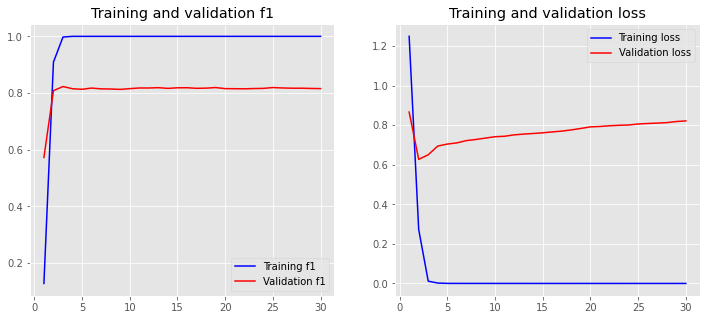

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training f1: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing f1:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
df_test = pd.read_fwf(path+'test_source_tweets.txt',sep = "\t",header=None,
    names=["idTweet", "text"],  # set our own names for the columns
)

df_test['text'] = df_test['text'].apply(lambda x : text_prepare(x))

df_test = df_test.set_index("idTweet")
df_test = df_test["text"]
df_test

idTweet
689719109785907200    death toll #bachakhanuniattack rises least 19 ...
531300385248800768    head isis abu bakr albaghdadi said critically ...
652992524504600576    steve jobs adopted biological father abdulfatt...
509473920060104704    microsoft buy mojang report url 2 billion deal...
651321040119963648    el chapo puts 100 million bounty donald trumpd...
                                            ...                        
642432477185867776                                stickers fruit edible
693236688538243074    truth nod thexfiles cia releases hundreds decl...
504131150429061121    breaking fbi uncovers new audio neighbor skype...
692004901455556608    potus announced new reforms address overuse so...
692157602554343424               waiting new episode #teenwolf like url
Name: text, Length: 213, dtype: object

In [ ]:
X_test_final = df_test
X_test_final

idTweet
689719109785907200    death toll #bachakhanuniattack rises least 19 ...
531300385248800768    head isis abu bakr albaghdadi said critically ...
652992524504600576    steve jobs adopted biological father abdulfatt...
509473920060104704    microsoft buy mojang report url 2 billion deal...
651321040119963648    el chapo puts 100 million bounty donald trumpd...
                                            ...                        
642432477185867776                                stickers fruit edible
693236688538243074    truth nod thexfiles cia releases hundreds decl...
504131150429061121    breaking fbi uncovers new audio neighbor skype...
692004901455556608    potus announced new reforms address overuse so...
692157602554343424               waiting new episode #teenwolf like url
Name: text, Length: 213, dtype: object

In [ ]:
ids = list(X_test_final.index)

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_test_final  = vectorizer.transform(df_test)

In [ ]:
tree = spatial.KDTree(tweets_labels_2)
lis = []
for i in range(len(ids)):
  v1 = model.predict(X_test_final[i,:])
  v1_closets = tweets_labels_2[ tree.query(v1)[1] ][0]
  index = np.where(np.all(tweets_labels_2==v1_closets,axis=1))[0][0]
  l = single_labels[index]
  lis.append([ids[i], l])
lis

[[689719109785907200, 'non-rumor'],
 [531300385248800768, 'unverified'],
 [652992524504600576, 'false'],
 [509473920060104704, 'true'],
 [651321040119963648, 'false'],
 [656047932093763584, 'false'],
 [519447199164665856, 'false'],
 [580320684305416192, 'unverified'],
 [544512676643500033, 'true'],
 [723521076446142465, 'non-rumor'],
 [500281094239817728, 'unverified'],
 [693843042546106369, 'non-rumor'],
 [676586804242309121, 'non-rumor'],
 [682999206290829312, 'non-rumor'],
 [553543369604210689, 'unverified'],
 [562313802369073153, 'true'],
 [693792605755285504, 'non-rumor'],
 [614467824313106432, 'true'],
 [544291965513134080, 'unverified'],
 [489968646014246912, 'false'],
 [570341828479725570, 'false'],
 [727623131494387714, 'unverified'],
 [524923676484177920, 'true'],
 [626898253900943360, 'false'],
 [690954487322796032, 'non-rumor'],
 [407173794583695360, 'true'],
 [691789524498845699, 'non-rumor'],
 [763896522790440960, 'unverified'],
 [544282227035869184, 'true'],
 [6928331404

In [ ]:
ids2 = list(labels.index)
labels2 = list(labels)
lis2 = []
for i in range(len(ids2)):
  lis2.append([ids2[i], labels2[i]])

In [ ]:
#lis = set(map(tuple, lis))
#lis2 = set(map(tuple, lis2))
#len(lis.symmetric_difference(lis2))

In [ ]:
#lis.symmetric_difference(lis2)

In [ ]:
df_final = pd.DataFrame.from_records(lis, columns = ["id","label"])
columnsTitles=["label","id"]
df_final=df_final.reindex(columns=columnsTitles)

In [ ]:
df_final

,label,id
0,non-rumor,689719109785907200
1,unverified,531300385248800768
2,false,652992524504600576
3,true,509473920060104704
4,false,651321040119963648
...,...,...
208,false,642432477185867776
209,non-rumor,693236688538243074
210,true,504131150429061121
211,non-rumor,692004901455556608


In [ ]:
df_final.to_csv('file_name.csv', index=False)

# Segunda forma (usando GloVe)

In [92]:
path = "INF-395-477---Tareas/Taller_2/kaggle/"
#os.mkdir("new_train")

## Preparando los datos

Esta primera parte es para pasar los datos a dataframe en pandas

In [93]:
x_train_total = pd.read_csv(path + "/train_source_tweets.txt",  sep="\t", header=None) 
x_train_total.columns = ["id", "tweet"]
x_test = pd.read_csv(path + "/test_source_tweets.txt",  sep="\t", header=None) 
x_test.columns = ["id", "tweet"]

In [94]:
y_train = pd.read_csv("/content/INF-395-477---Tareas/Taller_2/kaggle/train_labels.csv") 

In [95]:
y_train.head()

,label,id
0,non-rumor,692735698349199360
1,unverified,525008463819464704
2,false,505611045897924608
3,non-rumor,693466724822323200
4,true,510922415468449792


In [96]:
x_train_total.head()

,id,tweet
0,692735698349199360,north korea 'planning some kind of rocket laun...
1,525008463819464704,"meet kevin vickers, the hero who shot down the..."
2,505611045897924608,"15 year old who ""swatted"" gamer convicted of d..."
3,693466724822323200,audio recordings reveal cpr started 11 minutes...
4,510922415468449792,awful mt @scclemons:uk aid worker david haines...


In [97]:
data_train_total = x_train_total.set_index('id').join(y_train.set_index('id'))

In [98]:
labels = ['non-rumor', 'unverified', 'false', 'true']

In [99]:
for i in labels:
  new_colum = []
  for label in data_train_total["label"]:
    if label == i:
      new_colum.append(1)
    else:
      new_colum.append(0)
  data_train_total["label_"+i] = new_colum

In [100]:
y_train_total = data_train_total[['label_non-rumor', 'label_unverified', "label_false", "label_true"]]

In [101]:
y_train_total.head()

,label_non-rumor,label_unverified,label_false,label_true
id,,,,
692735698349199360,1,0,0,0
525008463819464704,0,1,0,0
505611045897924608,0,0,1,0
693466724822323200,1,0,0,0
510922415468449792,0,0,0,1


In [102]:
data_train_total.head()

,tweet,label,label_non-rumor,label_unverified,label_false,label_true
id,,,,,,
692735698349199360,north korea 'planning some kind of rocket laun...,non-rumor,1,0,0,0
525008463819464704,"meet kevin vickers, the hero who shot down the...",unverified,0,1,0,0
505611045897924608,"15 year old who ""swatted"" gamer convicted of d...",false,0,0,1,0
693466724822323200,audio recordings reveal cpr started 11 minutes...,non-rumor,1,0,0,0
510922415468449792,awful mt @scclemons:uk aid worker david haines...,true,0,0,0,1


In [103]:
len(data_train_total)

1926

In [104]:
cant_train = 1540

## Procesamiento de los tweets

Aquí se trabaja los tweet, lematizandolos y sacando los stopwords

In [105]:
tweets_train = x_train_total['tweet'].values.tolist()
tweets_test = x_test['tweet'].values.tolist()

In [106]:
#Se realiza sentiment analisis
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [107]:
# Se quitan los urls, hastag, menciones y fotos en el tweet
import re
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    # split into words
    from nltk.tokenize import word_tokenize
    tokens = word_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    import string
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return words

def clean_tweet(tweets):
    tweets_clean = []
    for tweet_raw in tweets:
        #tweet_clean = re.sub(r'(?P<url>https?://[^\s]+)', '', tweet_raw, flags=re.MULTILINE) #se extraen las url
        #tweet_clean = re.sub(r'#(\w+)', '', tweet_clean, flags=re.MULTILINE) #se extraen los hashtag
        #tweet_clean = re.sub(r'@([^\s:]+)', '', tweet_clean, flags=re.MULTILINE) #se extraen las menciones
        #tweet_clean = re.sub(r'pic.twitter.com/([^\s:]+)', '', tweet_clean, flags=re.MULTILINE) #se extaen las url de imagenes
        tweet_clean = word_extractor(tweet_raw)
        tweets_clean.append(tweet_clean)
    print("ejemplos:",tweets_clean[0:5])
    return tweets_clean

In [108]:
x_train_total['words'] = clean_tweet(tweets_train)
x_test['words'] = clean_tweet(tweets_test)

ejemplos: [['north', 'korea', 'planning', 'kind', 'rocket', 'launch', 'us', 'officials', 'say', 'citing', 'increased', 'activity', 'test', 'site', 'url'], ['meet', 'kevin', 'vickers', 'hero', 'shot', 'parliament', 'hill', 'gunman', 'ottawashooting', 'url', 'url'], ['year', 'old', 'swatted', 'gamer', 'convicted', 'domestic', 'terrorism', 'years', 'life', 'federal', 'prison', 'url'], ['audio', 'recordings', 'reveal', 'cpr', 'started', 'minutes', 'staff', 'found', 'gynnya', 'mcmillen', 'url', 'url'], ['awful', 'mt', 'scclemons', 'uk', 'aid', 'worker', 'david', 'haines', 'beheaded', 'isis', 'remember', 'great', 'man', 'way', 'isis', 'wants', 'url']]
ejemplos: [['death', 'toll', 'bachakhanuniattack', 'rises', 'least', 'army', 'official', 'says', 'firing', 'stopped', 'campus', 'searched', 'url'], ['head', 'isis', 'abu', 'bakr', 'albaghdadi', 'said', 'critically', 'wounded', 'us', 'air', 'strike', 'url'], ['steve', 'jobs', 'adopted', 'biological', 'father', 'abdulfattah', 'jandali', 'syrian',

Finalmente queda una lista con las palabras lematizadas:

In [109]:
x_train_total.head()

,id,tweet,words
0,692735698349199360,north korea 'planning some kind of rocket laun...,"[north, korea, planning, kind, rocket, launch,..."
1,525008463819464704,"meet kevin vickers, the hero who shot down the...","[meet, kevin, vickers, hero, shot, parliament,..."
2,505611045897924608,"15 year old who ""swatted"" gamer convicted of d...","[year, old, swatted, gamer, convicted, domesti..."
3,693466724822323200,audio recordings reveal cpr started 11 minutes...,"[audio, recordings, reveal, cpr, started, minu..."
4,510922415468449792,awful mt @scclemons:uk aid worker david haines...,"[awful, mt, scclemons, uk, aid, worker, david,..."


## Usando GloVe

Antes de ejecutar, descargar Glove en la siguiente página http://nlp.stanford.edu/data/glove.6B.zip , descomprimir el archivo y colocar el path donde se encuentra el archivo "glove.6B.300d.txt" en la siguiente variable

In [110]:
path_Glove = "/content/drive/My Drive/USM Carpeta Personal/Redes Neuronales/Talleres (tareas)/Taller 2/"

In [111]:
#/content/drive/My Drive/USM Carpeta Personal/Redes Neuronales/Talleres (tareas)/Taller 2/glove.6B.300d.txt
EMBEDDING_DIM = 300
GLOVE_FILE = path_Glove + "glove.6B.300d.txt"
embeddings_index = {}
with open(GLOVE_FILE,encoding="utf8") as file:
    for line in file:
        values = line.split()
        embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')

Lo que hará word2vec es complementar la matriz de frencuencia antes creada para calzar las palabras nuevas que no estén en el vocabulario a la que se encuentre mas cercana según distancias entre los vectores del word2vec pre entrenado.

Así por ejemplo, si el tweet 1 contiene la palabra "house" y esta no se encuentra en el vocabulario que se formo con las palabras del entrenamiento, entonces la asociará a la palabra más cercana del modelo pre entrenado, que podría ser "home".

![texto alternativo](https://i.imgur.com/s0KaPGV.png)

In [112]:
#se crea el vocabulario de las palabras en texts_train
def get_vocab(texts):
    vocab = []
    for text in texts:
        for word in text:
            if word in [".",",","'s","'","-","_"]:
                continue
            if word not in vocab:
                vocab.append(word)
    return vocab

vocab_train_haressment = ""
vocab_train  = get_vocab(x_train_total.words.values.tolist())

In [113]:
#acotar embeddings_index por el vocabulario
embeddings_index_in_vocab = {}
for word in vocab_train:
    if word in embeddings_index:
        embeddings_index_in_vocab[word] = embeddings_index.get(word)

In [114]:
#sp.sparse.csr_matrix((3, 4), dtype=np.int8).toarray()
import scipy as sp
def transform(vocab,texts):
    index_find_previously = {}
    rows = []
    cols = []
    datas = []
    new_matrix = sp.sparse.csr_matrix((len(texts), len(vocab)), dtype=np.float64)
    for row in range(len(texts)):
        data_temp = {}
        for word in texts[row]:
            if word in [".",",","'s","'","-","_"]:
                continue
            if word in vocab:
                if vocab.index(word) in data_temp:
                    data_temp[vocab.index(word)] +=1
                else:
                    data_temp[vocab.index(word)] = 1
            elif word in embeddings_index:
                if word not in index_find_previously:
                    index_find = find_closest_embeddings(vocab,word)
                    index_find_previously[word] = index_find
                else:
                    index_find = index_find_previously[word]
                
                if index_find == -1:
                    continue
                
                if index_find in data_temp:
                    data_temp[index_find] +=1
                else:
                    data_temp[index_find] = 1
        for col,data in data_temp.items():
            rows.append(row)
            cols.append(col)
            datas.append(data)
    return sp.sparse.csr_matrix((datas, (rows, cols)), shape=(len(texts), len(vocab)))

import heapq
def find_closest_embeddings(vocab,word_search):
    words_find = heapq.nsmallest(2,embeddings_index_in_vocab.keys(),key=lambda word: sp.spatial.distance.euclidean(embeddings_index_in_vocab.get(word),embeddings_index.get(word_search)))
    for word in words_find:
        if word in vocab:
            #print("encontro",word)
            return vocab.index(word)
    #"no se encontro ninguna palabra parecida a word_search
    return -1

Se forman dos matrices, una con los tweet de entramiento y la segunda con los tweet de test

In [115]:
train_total_vecs_w2v = transform(vocab_train,x_train_total.words.values.tolist())
print("terminó features_train")

termino features_train


In [116]:
test_vecs_w2v = transform(vocab_train,x_test.words.values.tolist())
print("terminó features_test")

termino features_test


## Creación del modelo y entrenamiento

In [118]:
#Se define f1
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [119]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_dim=5325))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',f1_m])

model.fit(train_total_vecs_w2v, y_train_total, epochs=10, batch_size=32, verbose=2)


Epoch 1/10
 - 2s - loss: 1.0891 - accuracy: 0.5400 - f1_m: 0.3026
Epoch 2/10
 - 0s - loss: 0.1776 - accuracy: 0.9465 - f1_m: 0.9436
Epoch 3/10
 - 0s - loss: 0.0158 - accuracy: 0.9958 - f1_m: 0.9961
Epoch 4/10
 - 0s - loss: 0.0034 - accuracy: 0.9995 - f1_m: 0.9995
Epoch 5/10
 - 0s - loss: 0.0011 - accuracy: 1.0000 - f1_m: 1.0000
Epoch 6/10
 - 0s - loss: 8.4422e-04 - accuracy: 1.0000 - f1_m: 1.0000
Epoch 7/10
 - 0s - loss: 6.0470e-04 - accuracy: 1.0000 - f1_m: 1.0000
Epoch 8/10
 - 0s - loss: 3.4050e-04 - accuracy: 1.0000 - f1_m: 1.0000
Epoch 9/10
 - 0s - loss: 2.8078e-04 - accuracy: 1.0000 - f1_m: 1.0000
Epoch 10/10
 - 0s - loss: 2.4758e-04 - accuracy: 1.0000 - f1_m: 1.0000


In [120]:
y_pred = model.predict_classes(test_vecs_w2v)

In [121]:
y_pred

array([0, 1, 2, 3, 2, 2, 2, 2, 3, 1, 1, 0, 1, 0, 3, 3, 0, 3, 1, 2, 2, 1,
       3, 2, 0, 0, 2, 3, 3, 0, 0, 0, 2, 1, 2, 0, 3, 3, 3, 3, 0, 1, 0, 1,
       3, 2, 3, 2, 3, 3, 2, 2, 0, 2, 2, 3, 3, 2, 0, 3, 1, 2, 2, 0, 0, 3,
       2, 3, 2, 3, 2, 0, 3, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 2, 2, 0, 0, 2,
       0, 0, 3, 1, 1, 2, 1, 0, 2, 2, 2, 0, 2, 2, 1, 3, 0, 1, 0, 3, 3, 0,
       2, 0, 0, 2, 3, 3, 2, 2, 3, 0, 0, 0, 0, 1, 2, 3, 1, 1, 2, 1, 2, 3,
       3, 0, 3, 3, 2, 0, 2, 0, 3, 2, 3, 0, 0, 1, 3, 0, 0, 2, 0, 3, 2, 2,
       3, 3, 0, 3, 1, 1, 3, 2, 2, 2, 2, 3, 1, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 2, 1, 0, 2, 2, 2, 0, 3, 3, 2, 1, 0, 2, 2, 3, 3, 3, 2, 2, 2, 1,
       1, 0, 2, 2, 2, 0, 3, 3, 3, 2, 3, 0, 3, 0, 0])

### Transformando los datos predecidos a formato submit

In [122]:
label = ['non-rumor', 'unverified', 'false', 'true']
y_pred_label = []
for i in y_pred:
  y_pred_label.append(label[i])

In [123]:
x_test["label"] = y_pred_label

In [124]:
x_test

,id,tweet,words,label
0,689719109785907200,death toll from #bachakhanuniattack rises to a...,"[death, toll, bachakhanuniattack, rises, least...",non-rumor
1,531300385248800768,"the head of isis, abu bakr al-baghdadi, is sai...","[head, isis, abu, bakr, albaghdadi, said, crit...",unverified
2,652992524504600576,steve jobs was adopted. his biological father ...,"[steve, jobs, adopted, biological, father, abd...",false
3,509473920060104704,microsoft to buy mojang - report URL $2 billio...,"[microsoft, buy, mojang, report, url, billion,...",true
4,651321040119963648,el chapo puts $100 million bounty on donald tr...,"[el, chapo, puts, million, bounty, donald, tru...",false
...,...,...,...,...
208,642432477185867776,the stickers on fruit are edible.,"[stickers, fruit, edible]",true
209,693236688538243074,"is the truth out there? in nod to @thexfiles, ...","[truth, nod, thexfiles, cia, releases, hundred...",non-rumor
210,504131150429061121,breaking: fbi uncovers new audio from neighbor...,"[breaking, fbi, uncovers, new, audio, neighbor...",true
211,692004901455556608,.@potus just announced new reforms to address ...,"[potus, announced, new, reforms, address, over...",non-rumor


In [125]:
x_test.to_csv('sub_1.csv', columns=["label","id"] , index=False)